In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skt
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
import sklearn.metrics as metrics

### Features para Temperatura Minima

In [3]:
target= ['TEMPERATURA MAXIMA (C)']
features = ['Altitude(metros)',
                         'Latitude',
                         'Longitude',
                         'UMIDADE RELATIVA DO MAXIMA AR (%)',
                         'UMIDADE RELATIVA DO MINIMA AR (%)']
features

['Altitude(metros)',
 'Latitude',
 'Longitude',
 'UMIDADE RELATIVA DO MAXIMA AR (%)',
 'UMIDADE RELATIVA DO MINIMA AR (%)']

### Criando o dataframe que ira guardar os valores d

In [3]:
data_tmax_erros = pd.DataFrame(columns=['Month','Qto_estacoes','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE'])

### Pegando as base de dados do primeiro mês


In [4]:
data_mean_jan = pd.read_csv('../Dados/Brasil_1_mean.csv')

In [5]:
data_mean_jan.describe().T

,count,mean,std,min,25%,50%,75%,max
Altitude(metros),458.0,365.521834,282.831588,2.000000,108.250000,318.500000,557.250000,997.000000
Codigo OMM,458.0,85201.056769,2325.371846,81609.000000,81950.250000,86710.000000,86854.750000,86998.000000
Day,458.0,15.927174,0.283932,12.296099,15.858514,15.997478,16.003929,16.647280
H(UTC),458.0,11.587590,0.172818,11.338053,11.497550,11.509815,11.619378,13.223013
Latitude,458.0,-15.371909,8.276341,-33.742297,-21.949157,-15.290187,-8.505388,3.813583
Longitude,458.0,-48.015097,7.263208,-72.786778,-52.955566,-48.228444,-42.155827,-34.815627
Month,458.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
PRECIPITACAO (mm),458.0,0.248918,0.118368,0.014519,0.161988,0.230883,0.331988,0.820430
PRESSAO ATMOSFERICA (hPa),458.0,970.463632,31.018293,902.892063,949.023218,974.637815,998.353330,1013.233360
PRESSAO ATMOSFÉRICA MAXIMA (hPa),458.0,970.749562,31.026400,903.143750,949.286285,974.962664,998.617348,1013.462668


In [67]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_jan[features], 
                                                    data_mean_jan[target],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0.1,0.9))
scaler_y = MinMaxScaler(feature_range=(0.1,0.9))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)


mlp = MLPRegressor(hidden_layer_sizes=(2*len(features)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('Error(UR_true - UR_pred)')
print('MIN: {} \tMAX: {} \tMEAN: {}\tStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.9677423881328222
MAE: 0.25726592076412136
MSE: 0.11358066017241283
MSLE: 0.0001624419780886021
MedLE: 0.19910541708604512
R2 Score: 0.9670260439495697
Error(UR_true - UR_pred)
MIN: 0.005483161586870011 	MAX: 0.9944498562859536 	MEAN: 0.25726592076412136	Std: 0.21770371192472046


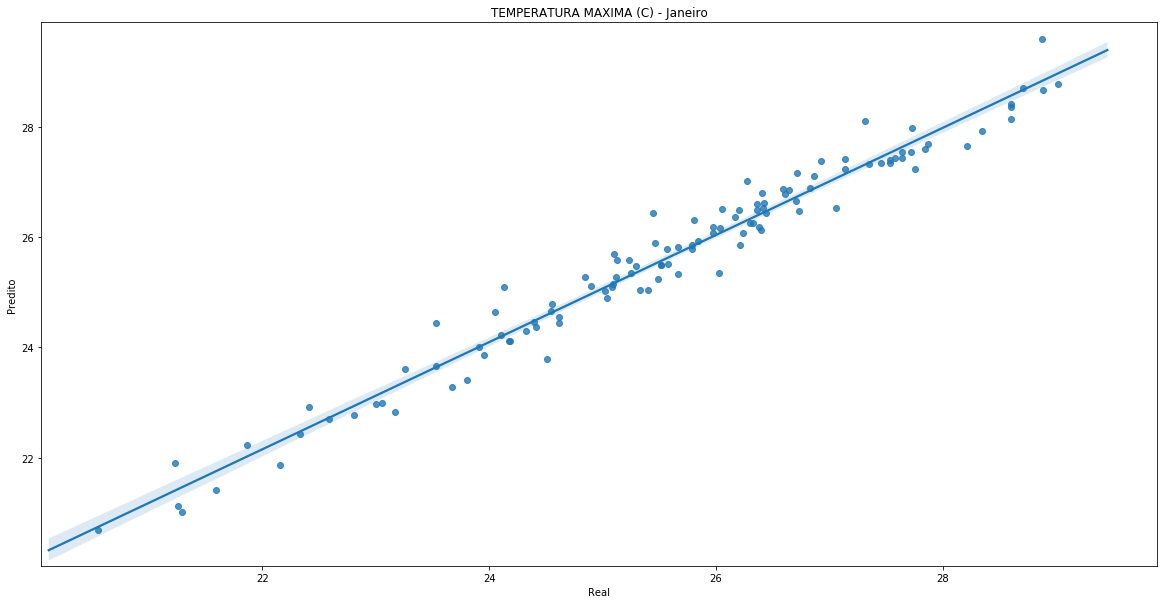

In [68]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())-0.5,max(y_test.max(),y_pred.max())+.3))
plt.ylim((min(y_test.min(),y_pred.min())-0.5,max(y_test.max(),y_pred.max())+.3))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title(target[0] + ' - Janeiro')
plt.savefig('../Validacao/graph/T_max_jan.png')

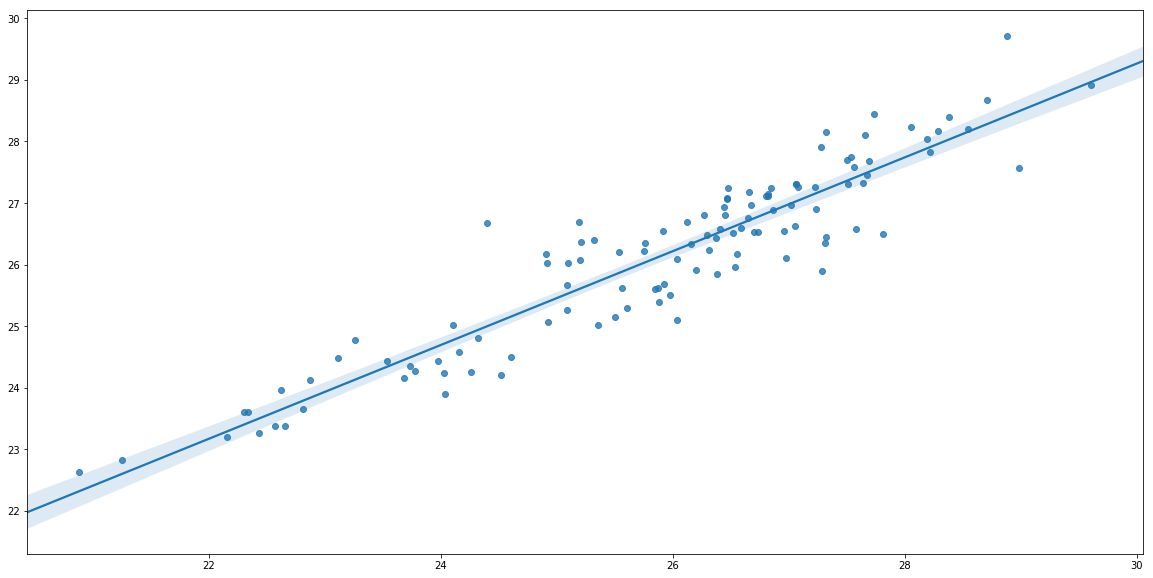

In [11]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)

In [12]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_tmax_erros.loc[1]=['Janeiro',len(data_mean_jan),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_tmax_erros

,Month,Qto_estacoes,ER_mean,ER_min,ER_max,ER_std,Variance,R2_score,MAE,MSE,MSLE,MedLE
1,Janeiro,458,0.239914,0.001453,0.942484,0.201683,0.968787,0.968587,0.239914,0.098235,0.000132,0.185357


In [14]:
pickle.dump(mlp,open('../Models/Tmax/tmax_1.model','wb'))

## Fevereiro

In [5]:
data_mean_fev = pd.read_csv('../Dados/Brasil_2_mean.csv')

In [34]:
data_mean_fev.describe().T

,count,mean,std,min,25%,50%,75%,max
Altitude(metros),458.0,365.041836,283.263611,1.161000,104.750000,318.500000,557.250000,997.000000
Codigo OMM,458.0,85211.521834,2321.364258,81609.000000,81951.250000,86711.500000,86854.750000,86998.000000
Day,458.0,14.716247,0.347290,13.441386,14.582174,14.657739,14.823101,18.333333
H(UTC),458.0,11.575303,0.182531,10.000000,11.500000,11.516221,11.607779,13.281658
Latitude,458.0,-15.386842,8.270897,-33.742297,-21.949157,-15.312444,-8.505388,3.813583
Longitude,458.0,-47.960816,7.169973,-72.747838,-52.921473,-48.193060,-42.155827,-34.815627
Month,458.0,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000
PRECIPITACAO (mm),458.0,0.228806,0.118518,0.000000,0.139196,0.219439,0.299171,0.776980
PRESSAO ATMOSFERICA (hPa),458.0,970.632334,30.900937,903.079480,949.438490,974.775545,998.422340,1013.628806
PRESSAO ATMOSFÉRICA MAXIMA (hPa),458.0,970.655625,31.099888,887.633333,949.339697,974.661230,998.564971,1013.849143


In [63]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_fev[features], 
                                                    data_mean_fev[target],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0.1,0.9))
scaler_y = MinMaxScaler(feature_range=(0.1,0.9))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('Error(UR_true - UR_pred)')
print('MIN: {} \tMAX: {} \tMEAN: {}\tStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.9522036043233751
MAE: 0.29786470697426315
MSE: 0.15821390948034872
MSLE: 0.00023522389413999835
MedLE: 0.2266224703951707
R2 Score: 0.9510567373711123
Error(UR_true - UR_pred)
MIN: 0.00105379116108395 	MAX: 1.5972838042734274 	MEAN: 0.29786470697426315	Std: 0.26361055710931824


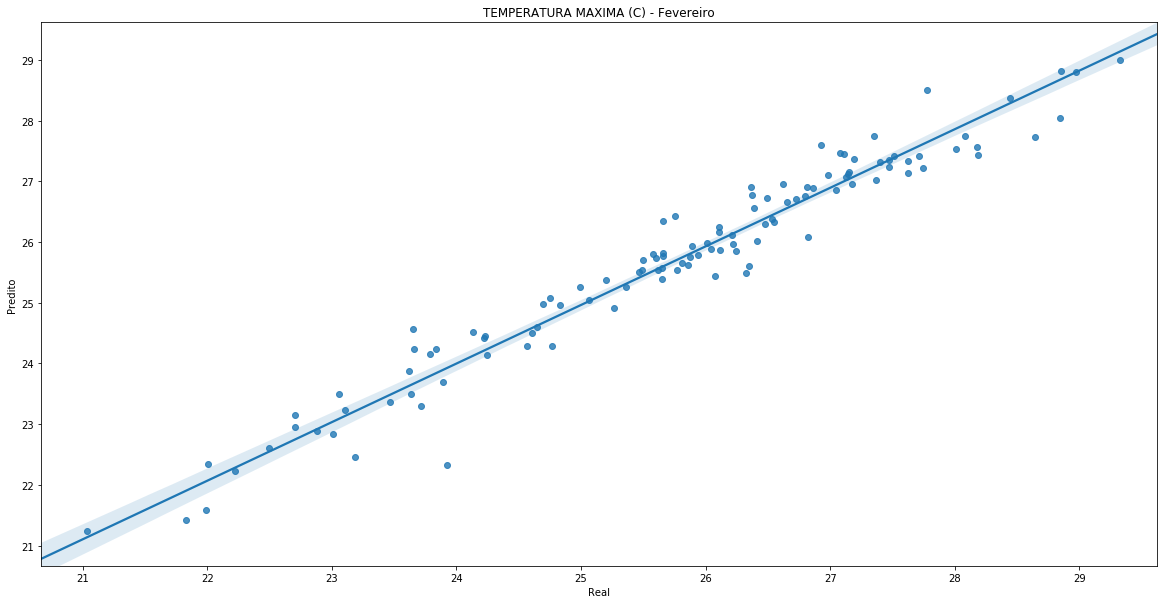

In [64]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())+0.5,max(y_test.max(),y_pred.max())+.3))
plt.ylim((min(y_test.min(),y_pred.min())+0.5,max(y_test.max(),y_pred.max())+.3))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title(target[0] + ' - Fevereiro')
plt.savefig('../Validacao/graph/T_max_fev.png')

In [33]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_tmax_erros.loc[2]=['Fevereiro',len(data_mean_fev),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_tmax_erros

,Month,Qto_estacoes,ER_mean,ER_min,ER_max,ER_std,Variance,R2_score,MAE,MSE,MSLE,MedLE
1,Janeiro,458,0.239914,0.001453,0.942484,0.201683,0.968787,0.968587,0.239914,0.098235,0.000132,0.185357
2,Fevereiro,458,0.288232,0.004754,0.903934,0.196898,0.959963,0.959947,0.288232,0.121846,0.000173,0.272867


In [34]:
pickle.dump(mlp,open('../Models/Tmax/tmax_2.model','wb'))

## Março

In [6]:
data_mean_mar = pd.read_csv('../Dados/Brasil_3_mean.csv')

In [50]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_mar[features], 
                                                    data_mean_mar[target],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0.1,0.9))
scaler_y = MinMaxScaler(feature_range=(0.1,0.9))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('\nError(UR_true - UR_pred)\n')
print('MIN: {} \nMAX: {} \nMEAN: {}\nStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.9797416157070278
MAE: 0.26185493476715865
MSE: 0.10957302763224291
MSLE: 0.00017074189794852372
MedLE: 0.21146556093336955
R2 Score: 0.9794774726192733

Error(UR_true - UR_pred)

MIN: 0.0017060380221565197 
MAX: 0.9880984310494192 
MEAN: 0.26185493476715865
Std: 0.2024969648422662


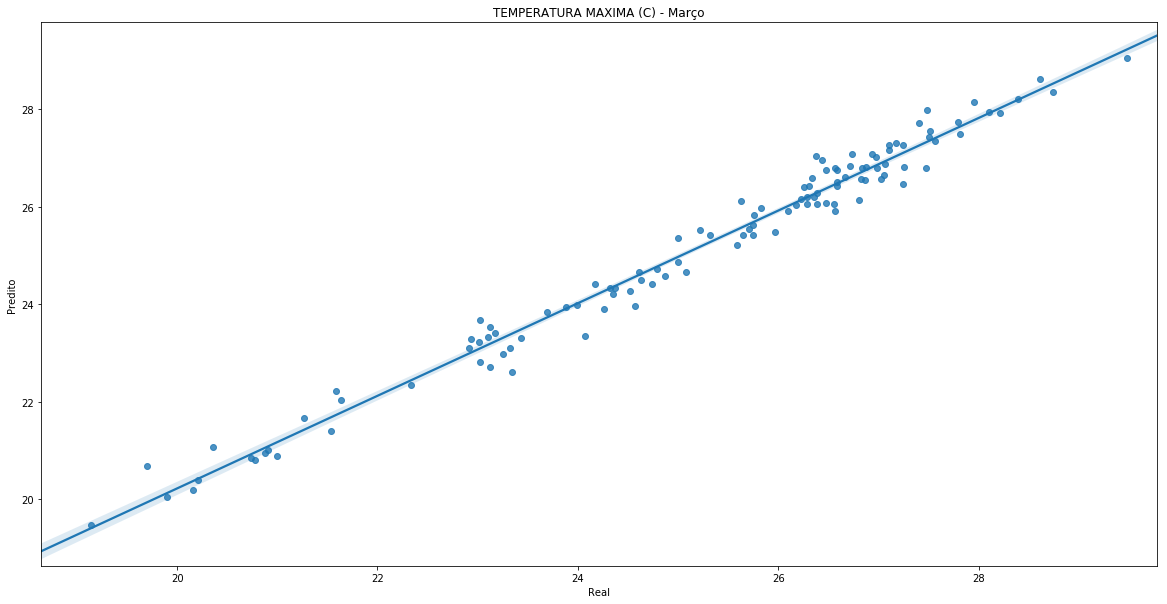

In [51]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())-0.5,max(y_test.max(),y_pred.max())+.3))
plt.ylim((min(y_test.min(),y_pred.min())-0.5,max(y_test.max(),y_pred.max())+.3))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title(target[0] + ' - Março')
plt.savefig('../Validacao/graph/T_max_mar.png')

In [40]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_tmax_erros.loc[3]=['Março',len(data_mean_mar),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_tmax_erros

,Month,Qto_estacoes,ER_mean,ER_min,ER_max,ER_std,Variance,R2_score,MAE,MSE,MSLE,MedLE
1,Janeiro,458,0.239914,0.001453,0.942484,0.201683,0.968787,0.968587,0.239914,0.098235,0.000132,0.185357
2,Fevereiro,458,0.288232,0.004754,0.903934,0.196898,0.959963,0.959947,0.288232,0.121846,0.000173,0.272867
3,Março,458,0.263496,0.000394,1.090846,0.224178,0.971557,0.970978,0.263496,0.119686,0.000171,0.199097


In [41]:
pickle.dump(mlp,open('../Models/Tmax/tmax_3.model','wb'))

## Abril

In [7]:
data_mean_abr = pd.read_csv('../Dados/Brasil_4_mean.csv')

In [43]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_abr[features], 
                                                    data_mean_abr[target],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0.1,0.9))
scaler_y = MinMaxScaler(feature_range=(0.1,0.9))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('\nError(UR_true - UR_pred)\n')
print('MIN: {} \nMAX: {} \nMEAN: {}\nStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.9718142186502371
MAE: 0.35426226790271975
MSE: 0.2019850745908985
MSLE: 0.0003423812982574078
MedLE: 0.2842990178612581
R2 Score: 0.9717712522180966

Error(UR_true - UR_pred)

MIN: 0.0007453926250740039 
MAX: 1.2625132013443299 
MEAN: 0.35426226790271975
Std: 0.2765561789787387


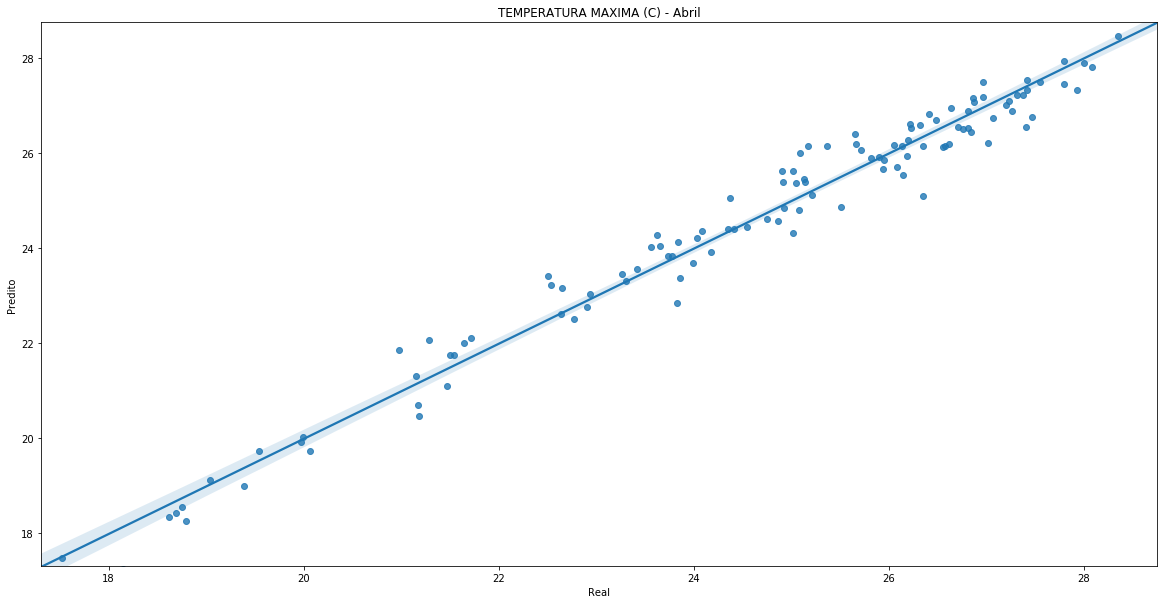

In [45]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())+0.5,max(y_test.max(),y_pred.max())+.3))
plt.ylim((min(y_test.min(),y_pred.min())+0.5,max(y_test.max(),y_pred.max())+.3))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title(target[0] + ' - Abril')
plt.savefig('../Validacao/graph/T_max_abr.png')

In [46]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_tmax_erros.loc[4]=['Abril',len(data_mean_abr),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_tmax_erros

,Month,Qto_estacoes,ER_mean,ER_min,ER_max,ER_std,Variance,R2_score,MAE,MSE,MSLE,MedLE
1,Janeiro,458,0.239914,0.001453,0.942484,0.201683,0.968787,0.968587,0.239914,0.098235,0.000132,0.185357
2,Fevereiro,458,0.288232,0.004754,0.903934,0.196898,0.959963,0.959947,0.288232,0.121846,0.000173,0.272867
3,Março,458,0.263496,0.000394,1.090846,0.224178,0.971557,0.970978,0.263496,0.119686,0.000171,0.199097
4,Abril,461,0.354262,0.000745,1.262513,0.276556,0.971814,0.971771,0.354262,0.201985,0.000342,0.284299


In [47]:
pickle.dump(mlp,open('../Models/Tmax/tmax_4.model','wb'))

## Maio

In [8]:
data_mean_mai = pd.read_csv('../Dados/Brasil_5_mean.csv')

In [80]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_mai[features], 
                                                    data_mean_mai[target],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0.1,0.9))
scaler_y = MinMaxScaler(feature_range=(0.1,0.9))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('\nError(UR_true - UR_pred)\n')
print('MIN: {} \nMAX: {} \nMEAN: {}\nStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.9819723903475229
MAE: 0.3694652428491883
MSE: 0.2415612506315543
MSLE: 0.0004300690652839314
MedLE: 0.272211397321132
R2 Score: 0.9819685412171769

Error(UR_true - UR_pred)

MIN: 0.00040280805673020836 
MAX: 1.9212891894697002 
MEAN: 0.3694652428491883
Std: 0.3241244899077276


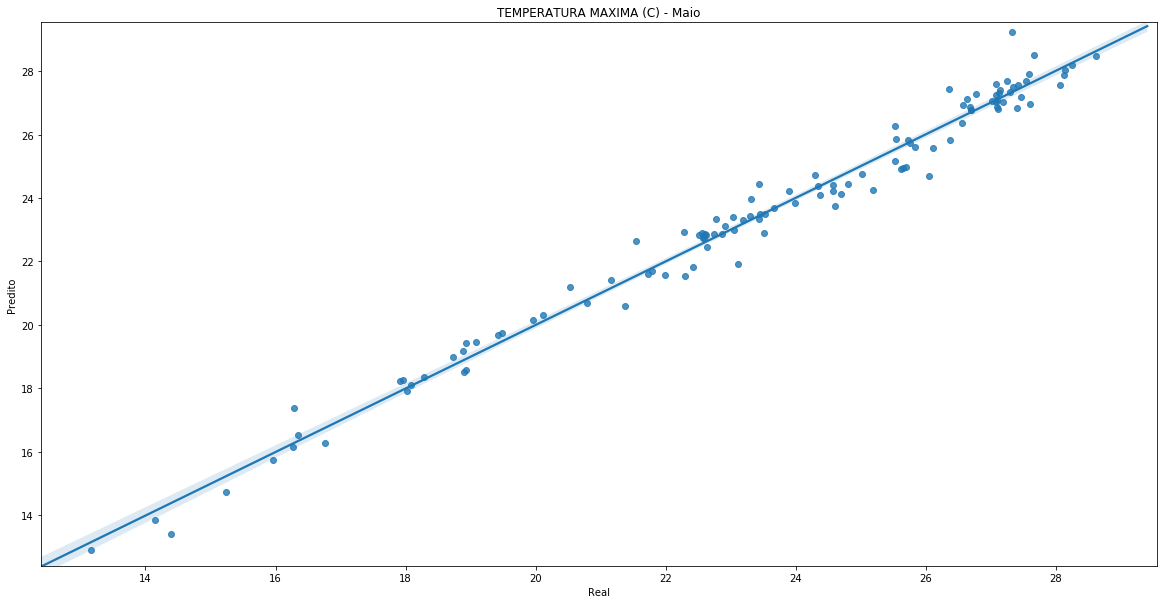

In [81]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())-0.5,max(y_test.max(),y_pred.max())+.3))
plt.ylim((min(y_test.min(),y_pred.min())-0.5,max(y_test.max(),y_pred.max())+.3))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title(target[0] + ' - Maio')
plt.savefig('../Validacao/graph/T_max_mai.png')

In [82]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_tmax_erros.loc[5]=['Maio',len(data_mean_mai),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_tmax_erros

,Month,Qto_estacoes,ER_mean,ER_min,ER_max,ER_std,Variance,R2_score,MAE,MSE,MSLE,MedLE
1,Janeiro,458,0.239914,0.001453,0.942484,0.201683,0.968787,0.968587,0.239914,0.098235,0.000132,0.185357
2,Fevereiro,458,0.288232,0.004754,0.903934,0.196898,0.959963,0.959947,0.288232,0.121846,0.000173,0.272867
3,Março,458,0.263496,0.000394,1.090846,0.224178,0.971557,0.970978,0.263496,0.119686,0.000171,0.199097
4,Abril,461,0.354262,0.000745,1.262513,0.276556,0.971814,0.971771,0.354262,0.201985,0.000342,0.284299
5,Maio,461,0.369465,0.000403,1.921289,0.324124,0.981972,0.981969,0.369465,0.241561,0.000430,0.272211


In [83]:
pickle.dump(mlp,open('../Models/Tmax/tmax_5.model','wb'))

## Junho

In [9]:
data_mean_jun = pd.read_csv('../Dados/Brasil_6_mean.csv')

In [84]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_jun[features], 
                                                    data_mean_jun[target],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0.1,0.9))
scaler_y = MinMaxScaler(feature_range=(0.1,0.9))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('\nError(UR_true - UR_pred)\n')
print('MIN: {} \nMAX: {} \nMEAN: {}\nStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.9897257317721598
MAE: 0.3620610755928363
MSE: 0.2385360183296838
MSLE: 0.0005958863418677586
MedLE: 0.26870401061391647
R2 Score: 0.9895274050695102

Error(UR_true - UR_pred)

MIN: 0.0019707131190500604 
MAX: 1.8851803012834463 
MEAN: 0.3620610755928363
Std: 0.32779230599610215


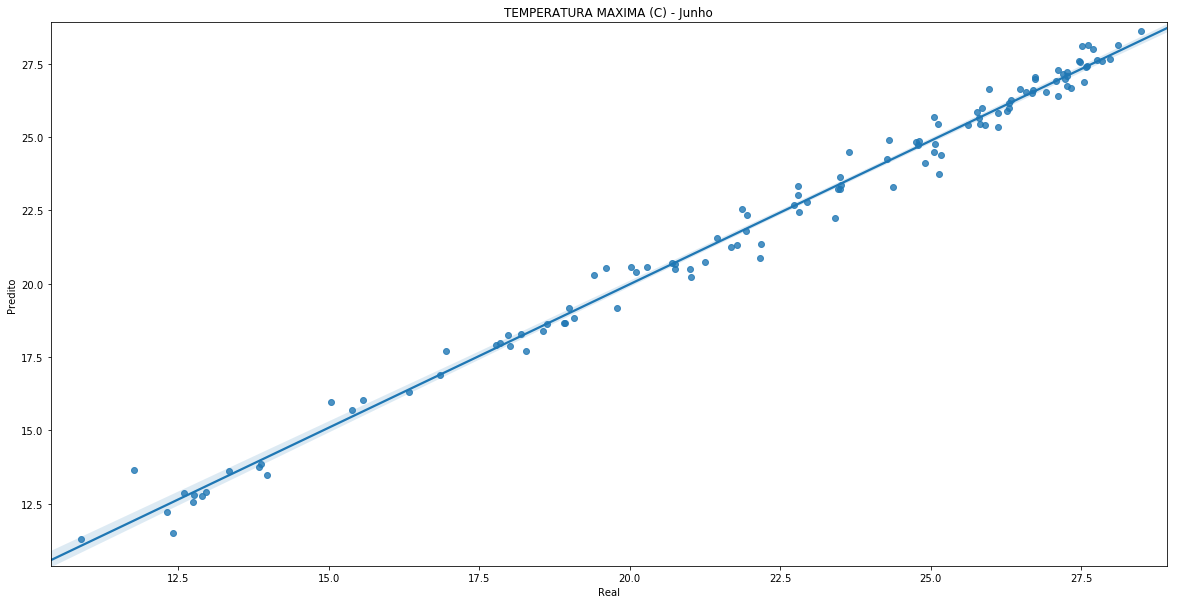

In [85]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())-0.5,max(y_test.max(),y_pred.max())+.3))
plt.ylim((min(y_test.min(),y_pred.min())-0.5,max(y_test.max(),y_pred.max())+.3))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title(target[0] + ' - Junho')
plt.savefig('../Validacao/graph/T_max_jun.png')

In [86]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_tmax_erros.loc[6]=['Junho',len(data_mean_jun),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_tmax_erros

,Month,Qto_estacoes,ER_mean,ER_min,ER_max,ER_std,Variance,R2_score,MAE,MSE,MSLE,MedLE
1,Janeiro,458,0.239914,0.001453,0.942484,0.201683,0.968787,0.968587,0.239914,0.098235,0.000132,0.185357
2,Fevereiro,458,0.288232,0.004754,0.903934,0.196898,0.959963,0.959947,0.288232,0.121846,0.000173,0.272867
3,Março,458,0.263496,0.000394,1.090846,0.224178,0.971557,0.970978,0.263496,0.119686,0.000171,0.199097
4,Abril,461,0.354262,0.000745,1.262513,0.276556,0.971814,0.971771,0.354262,0.201985,0.000342,0.284299
5,Maio,461,0.369465,0.000403,1.921289,0.324124,0.981972,0.981969,0.369465,0.241561,0.000430,0.272211
6,Junho,467,0.362061,0.001971,1.885180,0.327792,0.989726,0.989527,0.362061,0.238536,0.000596,0.268704


In [87]:
pickle.dump(mlp,open('../Models/Tmax/tmax_6.model','wb'))

## Julho

In [10]:
data_mean_jul = pd.read_csv('../Dados/Brasil_7_mean.csv')

In [135]:
data_mean_jul.describe().T

,count,mean,std,min,25%,50%,75%,max
Altitude(metros),467.0,366.839745,282.822694,1.161000,111.000000,324.000000,562.000000,997.000000
Codigo OMM,467.0,85230.299786,2312.301895,81609.000000,81952.500000,86710.000000,86853.500000,86998.000000
Day,467.0,16.028319,0.561838,5.750000,15.951357,16.000000,16.134801,17.969512
H(UTC),467.0,11.559463,0.226912,7.500000,11.500000,11.523430,11.594776,12.884146
Latitude,467.0,-15.379002,8.227039,-33.742297,-21.818064,-15.300159,-8.632726,3.813583
Longitude,467.0,-47.967093,7.213583,-72.786778,-52.882993,-48.177259,-42.216593,-34.815627
Month,467.0,7.000000,0.000000,7.000000,7.000000,7.000000,7.000000,7.000000
PRECIPITACAO (mm),467.0,0.076520,0.083894,0.000000,0.011619,0.041308,0.126478,0.406668
PRESSAO ATMOSFERICA (hPa),467.0,974.856763,30.987094,907.332957,953.696769,979.209565,1002.371722,1020.211619
PRESSAO ATMOSFÉRICA MAXIMA (hPa),467.0,974.845937,31.182594,890.525000,953.792560,979.070903,1002.534100,1020.436177


In [89]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_jul[features], 
                                                    data_mean_jul[target],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0.1,0.9))
scaler_y = MinMaxScaler(feature_range=(0.1,0.9))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('\nError(UR_true - UR_pred)\n')
print('MIN: {} \nMAX: {} \nMEAN: {}\nStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.9869337492502458
MAE: 0.3805788496793779
MSE: 0.24829981708418006
MSLE: 0.0005204478251129596
MedLE: 0.29784760130084464
R2 Score: 0.9869335057993603

Error(UR_true - UR_pred)

MIN: 0.004458907100424625 
MAX: 1.876976501778362 
MEAN: 0.3805788496793779
Std: 0.32165129606594406


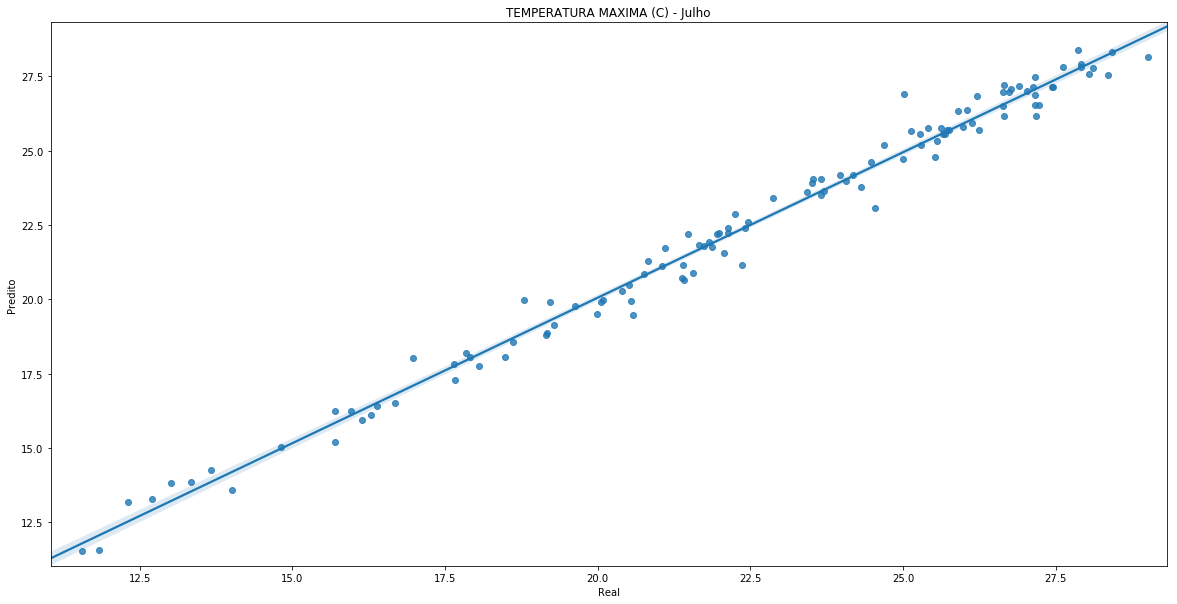

In [90]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())-0.5,max(y_test.max(),y_pred.max())+.3))
plt.ylim((min(y_test.min(),y_pred.min())-0.5,max(y_test.max(),y_pred.max())+.3))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title(target[0] + ' - Julho')
plt.savefig('../Validacao/graph/T_max_julho.png')

In [91]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_tmax_erros.loc[7]=['Julho',len(data_mean_jul),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_tmax_erros

,Month,Qto_estacoes,ER_mean,ER_min,ER_max,ER_std,Variance,R2_score,MAE,MSE,MSLE,MedLE
1,Janeiro,458,0.239914,0.001453,0.942484,0.201683,0.968787,0.968587,0.239914,0.098235,0.000132,0.185357
2,Fevereiro,458,0.288232,0.004754,0.903934,0.196898,0.959963,0.959947,0.288232,0.121846,0.000173,0.272867
3,Março,458,0.263496,0.000394,1.090846,0.224178,0.971557,0.970978,0.263496,0.119686,0.000171,0.199097
4,Abril,461,0.354262,0.000745,1.262513,0.276556,0.971814,0.971771,0.354262,0.201985,0.000342,0.284299
5,Maio,461,0.369465,0.000403,1.921289,0.324124,0.981972,0.981969,0.369465,0.241561,0.000430,0.272211
6,Junho,467,0.362061,0.001971,1.885180,0.327792,0.989726,0.989527,0.362061,0.238536,0.000596,0.268704
7,Julho,467,0.380579,0.004459,1.876977,0.321651,0.986934,0.986934,0.380579,0.248300,0.000520,0.297848


In [92]:
pickle.dump(mlp,open('../Models/Tmax/tmax_7.model','wb'))

## Agosto

In [11]:
data_mean_ago = pd.read_csv('../Dados/Brasil_8_mean.csv')

In [94]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_ago[features], 
                                                    data_mean_ago[target],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0.1,0.9))
scaler_y = MinMaxScaler(feature_range=(0.1,0.9))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('\nError(UR_true - UR_pred)\n')
print('MIN: {} \nMAX: {} \nMEAN: {}\nStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.9877927295828205
MAE: 0.37109522707013476
MSE: 0.22229535788456795
MSLE: 0.0004675992357965357
MedLE: 0.3203945490697464
R2 Score: 0.9877667484889807

Error(UR_true - UR_pred)

MIN: 0.007724669554207253 
MAX: 1.5728908340500016 
MEAN: 0.37109522707013476
Std: 0.29083275319388124


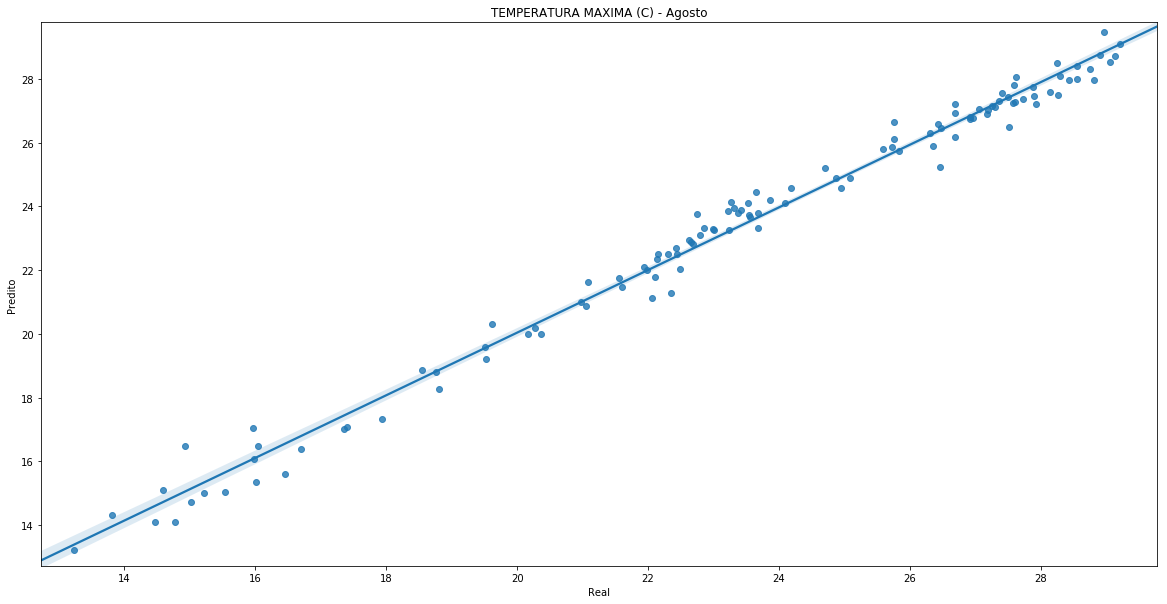

In [95]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())-0.5,max(y_test.max(),y_pred.max())+.3))
plt.ylim((min(y_test.min(),y_pred.min())-0.5,max(y_test.max(),y_pred.max())+.3))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title(target[0] + ' - Agosto')
plt.savefig('../Validacao/graph/T_max_ago.png')

In [96]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_tmax_erros.loc[8]=['Agosto',len(data_mean_ago),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_tmax_erros

,Month,Qto_estacoes,ER_mean,ER_min,ER_max,ER_std,Variance,R2_score,MAE,MSE,MSLE,MedLE
1,Janeiro,458,0.239914,0.001453,0.942484,0.201683,0.968787,0.968587,0.239914,0.098235,0.000132,0.185357
2,Fevereiro,458,0.288232,0.004754,0.903934,0.196898,0.959963,0.959947,0.288232,0.121846,0.000173,0.272867
3,Março,458,0.263496,0.000394,1.090846,0.224178,0.971557,0.970978,0.263496,0.119686,0.000171,0.199097
4,Abril,461,0.354262,0.000745,1.262513,0.276556,0.971814,0.971771,0.354262,0.201985,0.000342,0.284299
5,Maio,461,0.369465,0.000403,1.921289,0.324124,0.981972,0.981969,0.369465,0.241561,0.000430,0.272211
6,Junho,467,0.362061,0.001971,1.885180,0.327792,0.989726,0.989527,0.362061,0.238536,0.000596,0.268704
7,Julho,467,0.380579,0.004459,1.876977,0.321651,0.986934,0.986934,0.380579,0.248300,0.000520,0.297848
8,Agosto,468,0.371095,0.007725,1.572891,0.290833,0.987793,0.987767,0.371095,0.222295,0.000468,0.320395


In [97]:
pickle.dump(mlp,open('../Models/Tmax/tmax_8.model','wb'))

## Setembro

In [12]:
data_mean_set = pd.read_csv('../Dados/Brasil_9_mean.csv')

In [99]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_set[features], 
                                                    data_mean_set[target],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0.1,0.9))
scaler_y = MinMaxScaler(feature_range=(0.1,0.9))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('\nError(UR_true - UR_pred)\n')
print('MIN: {} \nMAX: {} \nMEAN: {}\nStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.9830649067738205
MAE: 0.4212263934212217
MSE: 0.3103074067743177
MSLE: 0.0005479765609494516
MedLE: 0.3101696420368185
R2 Score: 0.9829810329725955

Error(UR_true - UR_pred)

MIN: 0.013444413074026329 
MAX: 2.155703587007533 
MEAN: 0.4212263934212217
Std: 0.36452123704891015


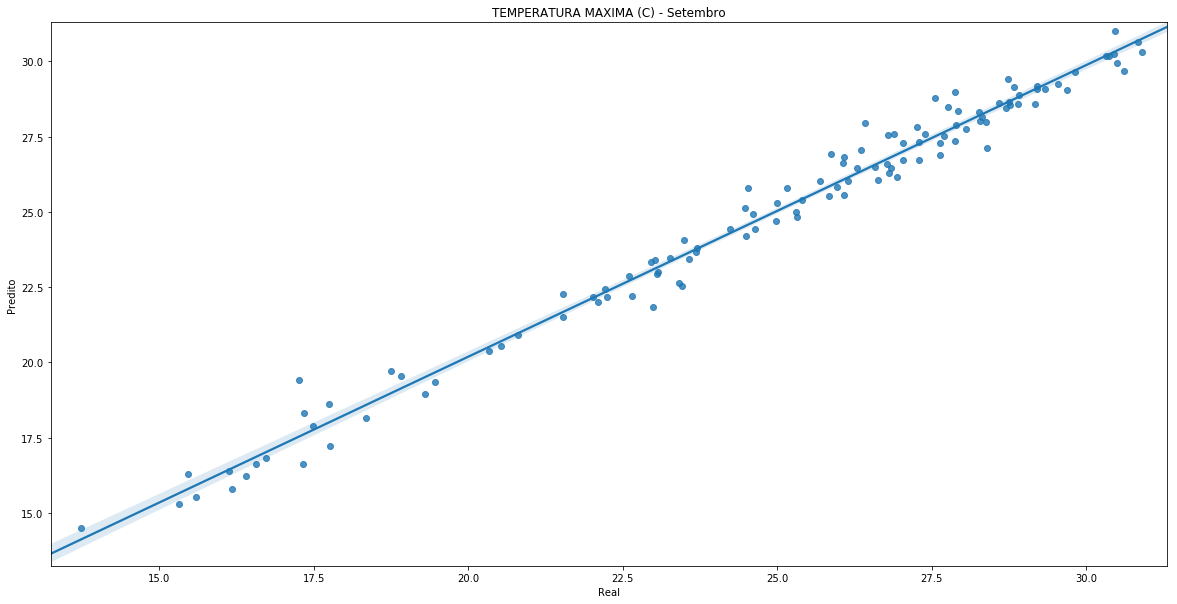

In [100]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())-0.5,max(y_test.max(),y_pred.max())+.3))
plt.ylim((min(y_test.min(),y_pred.min())-0.5,max(y_test.max(),y_pred.max())+.3))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title(target[0] + ' - Setembro')
plt.savefig('../Validacao/graph/T_max_set.png')

In [101]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_tmax_erros.loc[9]=['Setembro',len(data_mean_set),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_tmax_erros

,Month,Qto_estacoes,ER_mean,ER_min,ER_max,ER_std,Variance,R2_score,MAE,MSE,MSLE,MedLE
1,Janeiro,458,0.239914,0.001453,0.942484,0.201683,0.968787,0.968587,0.239914,0.098235,0.000132,0.185357
2,Fevereiro,458,0.288232,0.004754,0.903934,0.196898,0.959963,0.959947,0.288232,0.121846,0.000173,0.272867
3,Março,458,0.263496,0.000394,1.090846,0.224178,0.971557,0.970978,0.263496,0.119686,0.000171,0.199097
4,Abril,461,0.354262,0.000745,1.262513,0.276556,0.971814,0.971771,0.354262,0.201985,0.000342,0.284299
5,Maio,461,0.369465,0.000403,1.921289,0.324124,0.981972,0.981969,0.369465,0.241561,0.000430,0.272211
6,Junho,467,0.362061,0.001971,1.885180,0.327792,0.989726,0.989527,0.362061,0.238536,0.000596,0.268704
7,Julho,467,0.380579,0.004459,1.876977,0.321651,0.986934,0.986934,0.380579,0.248300,0.000520,0.297848
8,Agosto,468,0.371095,0.007725,1.572891,0.290833,0.987793,0.987767,0.371095,0.222295,0.000468,0.320395
9,Setembro,470,0.421226,0.013444,2.155704,0.364521,0.983065,0.982981,0.421226,0.310307,0.000548,0.310170


In [102]:
pickle.dump(mlp,open('../Models/Tmax/tmax_9.model','wb'))

## Outubro

In [13]:
data_mean_out = pd.read_csv('../Dados/Brasil_10_mean.csv')

In [134]:
data_mean_out.describe().T

,count,mean,std,min,25%,50%,75%,max
Altitude(metros),458.0,365.521834,282.831588,2.000000,108.250000,318.500000,557.250000,997.000000
Codigo OMM,458.0,85201.056769,2325.371846,81609.000000,81950.250000,86710.000000,86854.750000,86998.000000
Day,458.0,16.061867,0.290188,15.217968,15.976132,16.022788,16.121040,18.314941
H(UTC),458.0,11.560298,0.110060,11.120285,11.512070,11.524020,11.581455,12.879358
Latitude,458.0,-15.371909,8.276341,-33.742297,-21.949157,-15.290187,-8.505388,3.813583
Longitude,458.0,-48.015097,7.263208,-72.786778,-52.955566,-48.228444,-42.155827,-34.815627
Month,458.0,10.000000,0.000000,10.000000,10.000000,10.000000,10.000000,10.000000
PRECIPITACAO (mm),458.0,0.131662,0.078302,0.000000,0.073523,0.128828,0.182322,0.456183
PRESSAO ATMOSFERICA (hPa),458.0,971.318067,31.162328,903.264795,949.499793,975.195803,999.587317,1015.755566
PRESSAO ATMOSFÉRICA MAXIMA (hPa),458.0,971.631985,31.171819,903.536344,949.811199,975.505647,999.904376,1016.030281


In [104]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_out[features], 
                                                    data_mean_out[target],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0.1,0.9))
scaler_y = MinMaxScaler(feature_range=(0.1,0.9))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('\nError(UR_true - UR_pred)\n')
print('MIN: {} \nMAX: {} \nMEAN: {}\nStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.9811761208964511
MAE: 0.3702822135846704
MSE: 0.2539335825592266
MSLE: 0.0003824817673263243
MedLE: 0.30884383480510635
R2 Score: 0.9805136656105198

Error(UR_true - UR_pred)

MIN: 0.00030941786813798444 
MAX: 2.5623912074395747 
MEAN: 0.3702822135846704
Std: 0.3417962329547579


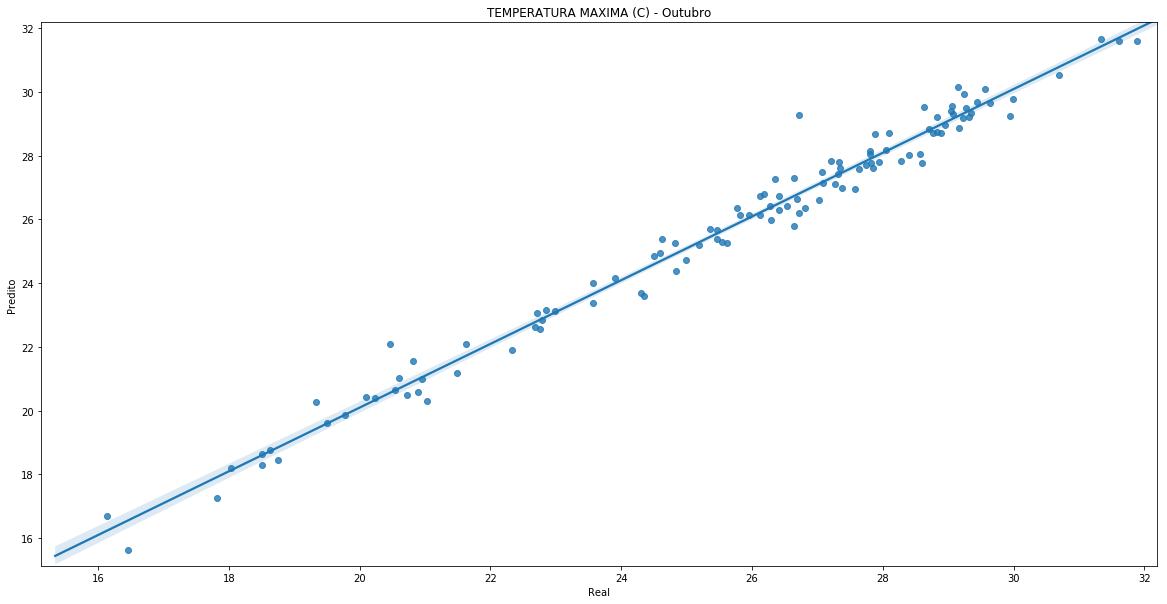

In [105]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())-0.5,max(y_test.max(),y_pred.max())+.3))
plt.ylim((min(y_test.min(),y_pred.min())-0.5,max(y_test.max(),y_pred.max())+.3))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title(target[0] + ' - Outubro')
plt.savefig('../Validacao/graph/T_max_out.png')

In [106]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_tmax_erros.loc[10]=['Outubro',len(data_mean_out),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_tmax_erros

,Month,Qto_estacoes,ER_mean,ER_min,ER_max,ER_std,Variance,R2_score,MAE,MSE,MSLE,MedLE
1,Janeiro,458,0.239914,0.001453,0.942484,0.201683,0.968787,0.968587,0.239914,0.098235,0.000132,0.185357
2,Fevereiro,458,0.288232,0.004754,0.903934,0.196898,0.959963,0.959947,0.288232,0.121846,0.000173,0.272867
3,Março,458,0.263496,0.000394,1.090846,0.224178,0.971557,0.970978,0.263496,0.119686,0.000171,0.199097
4,Abril,461,0.354262,0.000745,1.262513,0.276556,0.971814,0.971771,0.354262,0.201985,0.000342,0.284299
5,Maio,461,0.369465,0.000403,1.921289,0.324124,0.981972,0.981969,0.369465,0.241561,0.000430,0.272211
6,Junho,467,0.362061,0.001971,1.885180,0.327792,0.989726,0.989527,0.362061,0.238536,0.000596,0.268704
7,Julho,467,0.380579,0.004459,1.876977,0.321651,0.986934,0.986934,0.380579,0.248300,0.000520,0.297848
8,Agosto,468,0.371095,0.007725,1.572891,0.290833,0.987793,0.987767,0.371095,0.222295,0.000468,0.320395
9,Setembro,470,0.421226,0.013444,2.155704,0.364521,0.983065,0.982981,0.421226,0.310307,0.000548,0.310170
10,Outubro,458,0.370282,0.000309,2.562391,0.341796,0.981176,0.980514,0.370282,0.253934,0.000382,0.308844


In [107]:
pickle.dump(mlp,open('../Models/Tmax/tmax_10.model','wb'))

## Novembro

In [14]:
data_mean_nov = pd.read_csv('../Dados/Brasil_11_mean.csv')

In [147]:
data_mean_nov.describe().T

,count,mean,std,min,25%,50%,75%,max
Altitude(metros),459.0,364.728020,283.034068,1.161000,105.500000,313.000000,555.500000,997.000000
Codigo OMM,459.0,85204.355120,2323.906472,81609.000000,81950.500000,86711.000000,86854.500000,86998.000000
Day,459.0,15.484228,0.694570,2.000000,15.446692,15.500000,15.613861,17.454847
H(UTC),459.0,11.542632,0.556821,0.000000,11.500000,11.513941,11.591346,13.131043
Latitude,459.0,-15.372818,8.267324,-33.742297,-21.917960,-15.300159,-8.506776,3.813583
Longitude,459.0,-48.014903,7.255276,-72.786778,-52.947681,-48.201231,-42.164824,-34.815627
Month,459.0,11.000000,0.000000,11.000000,11.000000,11.000000,11.000000,11.000000
PRECIPITACAO (mm),459.0,0.184631,0.105958,0.000000,0.101004,0.195137,0.261841,0.583006
PRESSAO ATMOSFERICA (hPa),459.0,969.885133,31.110715,901.802811,948.560477,974.051447,997.497774,1013.363681
PRESSAO ATMOSFÉRICA MAXIMA (hPa),459.0,969.944415,31.338606,886.100000,948.766735,974.066673,997.792562,1013.630146


In [110]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_nov[features], 
                                                    data_mean_nov[target],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0.1,0.9))
scaler_y = MinMaxScaler(feature_range=(0.1,0.9))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('\nError(UR_true - UR_pred)\n')
print('MIN: {} \nMAX: {} \nMEAN: {}\nStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.9714798508362258
MAE: 0.3551106815348035
MSE: 0.21186524878955676
MSLE: 0.0003055125403108237
MedLE: 0.272197504554093
R2 Score: 0.9712614378755345

Error(UR_true - UR_pred)

MIN: 0.005135132994833924 
MAX: 1.5562753709555857 
MEAN: 0.3551106815348035
Std: 0.29285090515387546


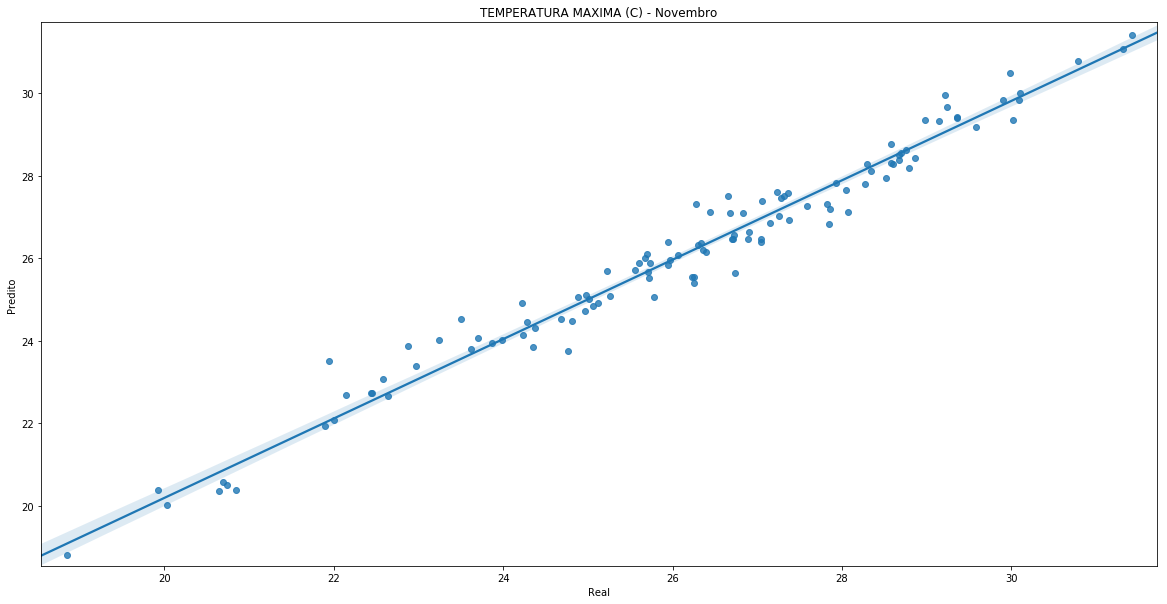

In [114]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())+0.3,max(y_test.max(),y_pred.max())+.3))
plt.ylim((min(y_test.min(),y_pred.min())+0.3,max(y_test.max(),y_pred.max())+.3))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title(target[0] + ' - Novembro')
plt.savefig('../Validacao/graph/T_max_nov.png')

In [115]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_tmax_erros.loc[11]=['Novembro',len(data_mean_nov),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_tmax_erros

,Month,Qto_estacoes,ER_mean,ER_min,ER_max,ER_std,Variance,R2_score,MAE,MSE,MSLE,MedLE
1,Janeiro,458,0.239914,0.001453,0.942484,0.201683,0.968787,0.968587,0.239914,0.098235,0.000132,0.185357
2,Fevereiro,458,0.288232,0.004754,0.903934,0.196898,0.959963,0.959947,0.288232,0.121846,0.000173,0.272867
3,Março,458,0.263496,0.000394,1.090846,0.224178,0.971557,0.970978,0.263496,0.119686,0.000171,0.199097
4,Abril,461,0.354262,0.000745,1.262513,0.276556,0.971814,0.971771,0.354262,0.201985,0.000342,0.284299
5,Maio,461,0.369465,0.000403,1.921289,0.324124,0.981972,0.981969,0.369465,0.241561,0.000430,0.272211
6,Junho,467,0.362061,0.001971,1.885180,0.327792,0.989726,0.989527,0.362061,0.238536,0.000596,0.268704
7,Julho,467,0.380579,0.004459,1.876977,0.321651,0.986934,0.986934,0.380579,0.248300,0.000520,0.297848
8,Agosto,468,0.371095,0.007725,1.572891,0.290833,0.987793,0.987767,0.371095,0.222295,0.000468,0.320395
9,Setembro,470,0.421226,0.013444,2.155704,0.364521,0.983065,0.982981,0.421226,0.310307,0.000548,0.310170
10,Outubro,458,0.370282,0.000309,2.562391,0.341796,0.981176,0.980514,0.370282,0.253934,0.000382,0.308844


In [116]:
pickle.dump(mlp,open('../Models/Tmax/tmax_11.model','wb'))

## Dezembro

In [15]:
data_mean_dez = pd.read_csv('../Dados/Brasil_12_mean.csv')

In [127]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_dez[features], 
                                                    data_mean_dez[target],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(-0.8,0.8))
scaler_y = MinMaxScaler(feature_range=(-0.8,0.8))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('\nError(UR_true - UR_pred)\n')
print('MIN: {} \nMAX: {} \nMEAN: {}\nStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.9690805706717264
MAE: 0.27067519281692964
MSE: 0.1343090609839359
MSLE: 0.0001848471419248372
MedLE: 0.19151537546921205
R2 Score: 0.9690401874382698

Error(UR_true - UR_pred)

MIN: 0.00244736897896658 
MAX: 1.4738986124210633 
MEAN: 0.27067519281692964
Std: 0.24707084202198745


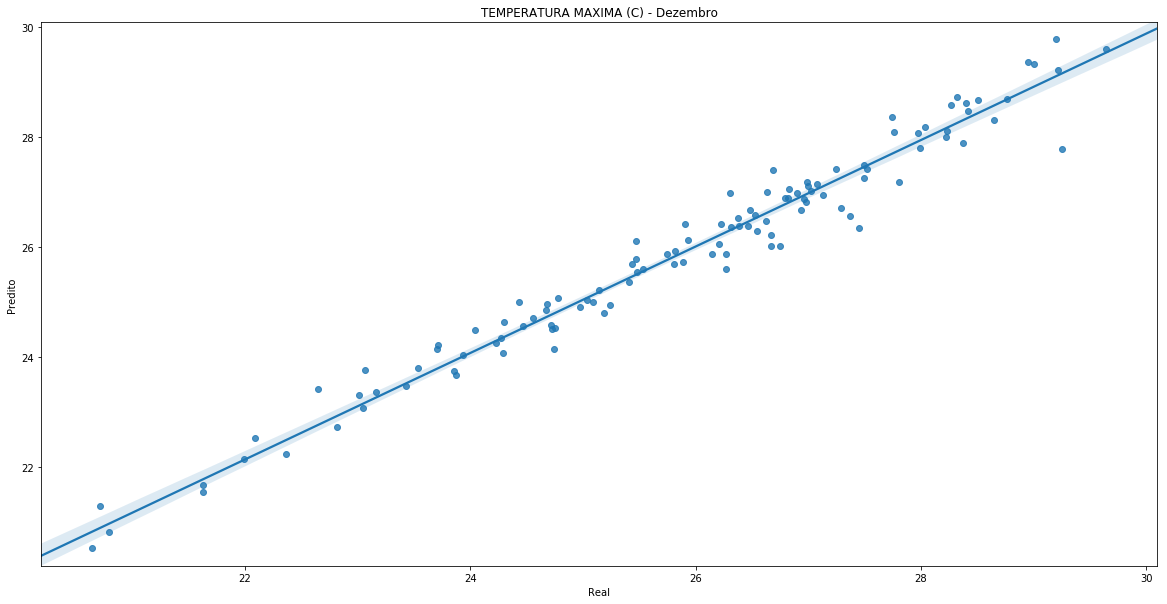

In [129]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())+0.5,max(y_test.max(),y_pred.max())+.3))
plt.ylim((min(y_test.min(),y_pred.min())+0.5,max(y_test.max(),y_pred.max())+.3))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title(target[0] + ' - Dezembro')
plt.savefig('../Validacao/graph/T_max_dez.png')

In [130]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_tmax_erros.loc[12]=['Dezembro',len(data_mean_dez),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_tmax_erros

,Month,Qto_estacoes,ER_mean,ER_min,ER_max,ER_std,Variance,R2_score,MAE,MSE,MSLE,MedLE
1,Janeiro,458,0.239914,0.001453,0.942484,0.201683,0.968787,0.968587,0.239914,0.098235,0.000132,0.185357
2,Fevereiro,458,0.288232,0.004754,0.903934,0.196898,0.959963,0.959947,0.288232,0.121846,0.000173,0.272867
3,Março,458,0.263496,0.000394,1.090846,0.224178,0.971557,0.970978,0.263496,0.119686,0.000171,0.199097
4,Abril,461,0.354262,0.000745,1.262513,0.276556,0.971814,0.971771,0.354262,0.201985,0.000342,0.284299
5,Maio,461,0.369465,0.000403,1.921289,0.324124,0.981972,0.981969,0.369465,0.241561,0.000430,0.272211
6,Junho,467,0.362061,0.001971,1.885180,0.327792,0.989726,0.989527,0.362061,0.238536,0.000596,0.268704
7,Julho,467,0.380579,0.004459,1.876977,0.321651,0.986934,0.986934,0.380579,0.248300,0.000520,0.297848
8,Agosto,468,0.371095,0.007725,1.572891,0.290833,0.987793,0.987767,0.371095,0.222295,0.000468,0.320395
9,Setembro,470,0.421226,0.013444,2.155704,0.364521,0.983065,0.982981,0.421226,0.310307,0.000548,0.310170
10,Outubro,458,0.370282,0.000309,2.562391,0.341796,0.981176,0.980514,0.370282,0.253934,0.000382,0.308844


In [131]:
pickle.dump(mlp,open('../Models/Tmax/tmax_12.model','wb'))

### Salvando as mestricas de avaliação

In [150]:
data_tmax_erros['std_target'] = [data_mean_jan[target].std()[0],
                                 data_mean_fev[target].std()[0],
 data_mean_mai[target].std()[0],data_mean_abr[target].std()[0],
 data_mean_mar[target].std()[0],data_mean_jun[target].std()[0],
 data_mean_jul[target].std()[0],data_mean_ago[target].std()[0],
 data_mean_set[target].std()[0],data_mean_out[target].std()[0],
 data_mean_nov[target].std()[0],data_mean_dez[target].std()[0]]
data_tmax_erros

,Month,Qto_estacoes,ER_mean,ER_min,ER_max,ER_std,Variance,R2_score,MAE,MSE,MSLE,MedLE,Var_target,std_target
1,Janeiro,458,0.239914,0.001453,0.942484,0.201683,0.968787,0.968587,0.239914,0.098235,0.000132,0.185357,1.775655,1.775655
2,Fevereiro,458,0.288232,0.004754,0.903934,0.196898,0.959963,0.959947,0.288232,0.121846,0.000173,0.272867,1.666223,1.666223
3,Março,458,0.263496,0.000394,1.090846,0.224178,0.971557,0.970978,0.263496,0.119686,0.000171,0.199097,3.843669,3.843669
4,Abril,461,0.354262,0.000745,1.262513,0.276556,0.971814,0.971771,0.354262,0.201985,0.000342,0.284299,2.639405,2.639405
5,Maio,461,0.369465,0.000403,1.921289,0.324124,0.981972,0.981969,0.369465,0.241561,0.000430,0.272211,2.098516,2.098516
6,Junho,467,0.362061,0.001971,1.885180,0.327792,0.989726,0.989527,0.362061,0.238536,0.000596,0.268704,4.477436,4.477436
7,Julho,467,0.380579,0.004459,1.876977,0.321651,0.986934,0.986934,0.380579,0.248300,0.000520,0.297848,4.411764,4.411764
8,Agosto,468,0.371095,0.007725,1.572891,0.290833,0.987793,0.987767,0.371095,0.222295,0.000468,0.320395,4.182997,4.182997
9,Setembro,470,0.421226,0.013444,2.155704,0.364521,0.983065,0.982981,0.421226,0.310307,0.000548,0.310170,4.155611,4.155611
10,Outubro,458,0.370282,0.000309,2.562391,0.341796,0.981176,0.980514,0.370282,0.253934,0.000382,0.308844,3.411434,3.411434


In [151]:
data_tmax_erros.to_csv('../Validacao/Tmax.csv',float_format='%.3f')

In [16]:
data_std = pd.DataFrame(columns=['Mês','Tmax','Tmin','URmax','URmin','Precipitação'])

In [19]:
data_std['Mês'] = ['Janeiro','Fevereiro','Março','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro','Novembro','Dezembro']

for column,target_std in zip(['Tmax','Tmin','URmax','URmin','Precipitação'],
                             [target[0],'TEMPERATURA MINIMA (C)','UMIDADE RELATIVA DO MAXIMA AR (%)','UMIDADE RELATIVA DO MINIMA AR (%)','PRECIPITACAO (mm)']):
    data_std[column] =[data_mean_jan[target_std].std(),data_mean_fev[target_std].std(),
                       data_mean_mar[target_std].std(),data_mean_abr[target_std].std(),
                       data_mean_mai[target_std].std(),data_mean_jun[target_std].std(),
                       data_mean_jul[target_std].std(),data_mean_ago[target_std].std(),
                       data_mean_set[target_std].std(),data_mean_out[target_std].std(),
                       data_mean_nov[target_std].std(),data_mean_dez[target_std].std()]
data_std


,Mês,Tmax,Tmin,URmax,URmin,Precipitação
0,Janeiro,1.775655,1.801156,6.832995,7.117130,0.118368
1,Fevereiro,1.666223,1.695128,6.708873,7.152496,0.118518
2,Março,2.098516,2.118605,6.338988,6.717542,0.120631
3,Abril,2.639405,2.666834,5.910778,6.365415,0.113583
4,Maio,3.843669,3.827771,7.140832,7.688150,0.103104
5,Junho,4.477436,4.412019,8.935864,9.486202,0.090984
6,Julho,4.411764,4.319171,11.501585,12.026824,0.083894
7,Agosto,4.182997,4.066033,13.716423,14.040964,0.063121
8,Setembro,4.155611,4.020234,13.210058,13.366882,0.073555
9,Outubro,3.411434,3.312872,10.646891,10.811372,0.078302


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12]

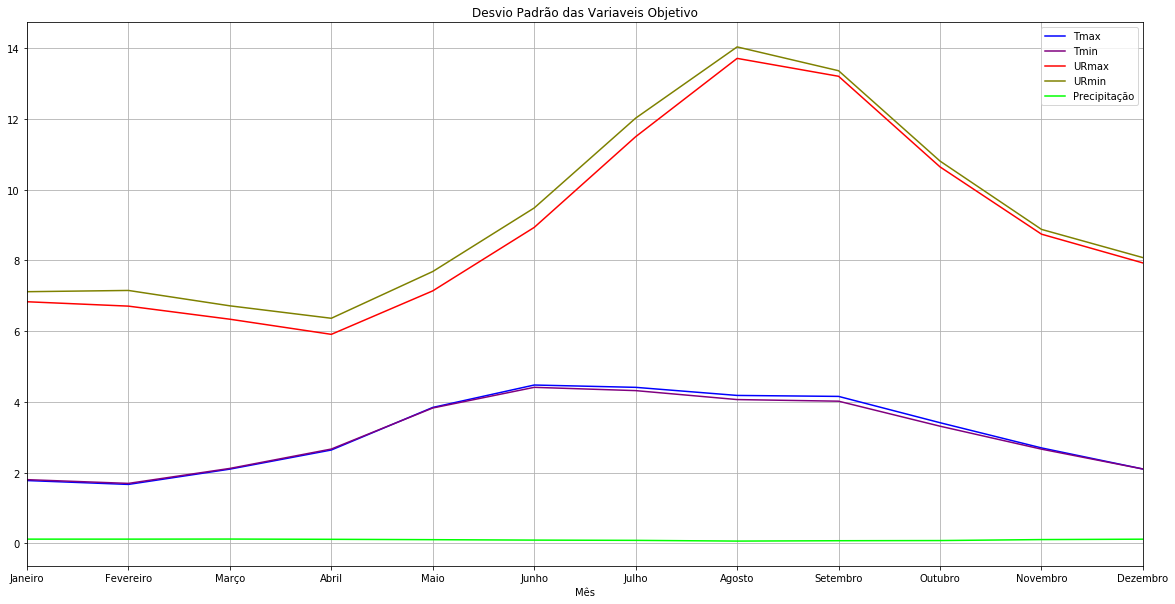

In [67]:
data_std.plot('Mês',grid=True,figsize=(20,10),xticks=[0,1,2,3,4,5,6,7,8,9,10,11],
              title='Desvio Padrão das Variaveis Objetivo',kind='line',xlim=(0,11),colormap='brg')
plt.savefig('std.png')

In [48]:
data_tmax_erros = pd.read_csv('../Validacao/Tmax.csv')

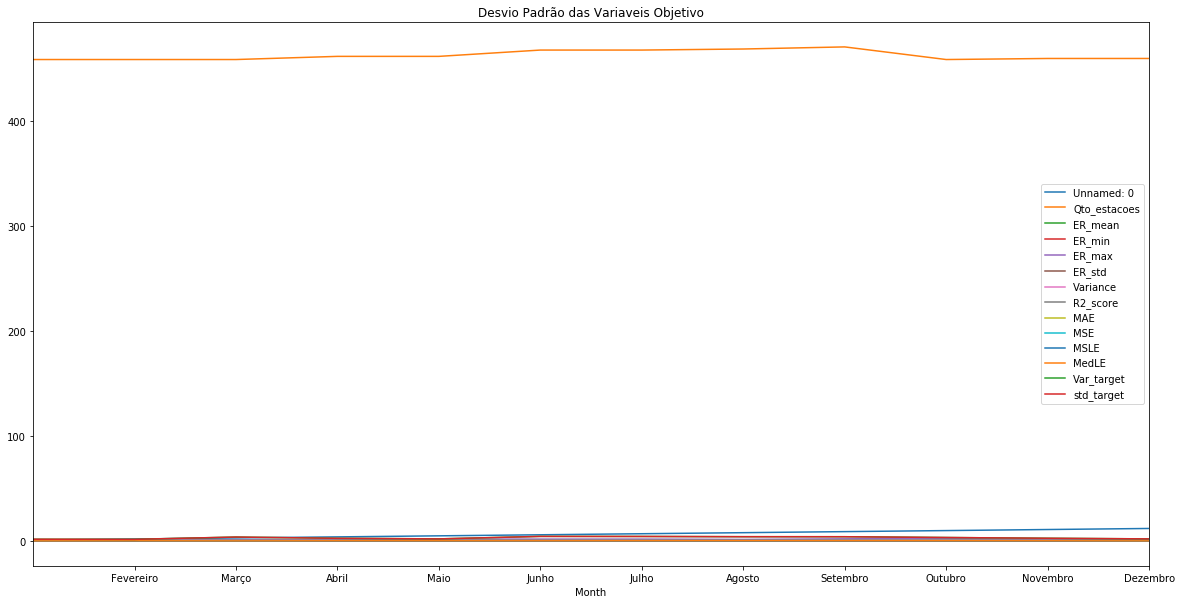

In [49]:
data_tmax_erros.plot('Month',figsize=(20,10),xticks=[1,2,3,4,5,6,7,8,9,10,11,12],title='Desvio Padrão das Variaveis Objetivo',kind='line',xlim=(0,11))